# Scikit Learn Library

In [1]:
# What is Scikit-Learn?

# Scikit-Learn is a simple and efficient tool for data mining and data analysis.

# Scikit-Learn is built on Numpy, Scipy, and Matplotlib 

# Scikit-Learn is an open-source, commercially usable licence.

In [2]:
# importing the required packages

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier

# from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline


#Note:The StandardScaler is the most commmonly used preprocessor

In [3]:
# Now all the imported packages have been saved

In [4]:
# Working Directory: You can check the current working directory to ensure it's the one you expect by using:

import os
print(os.getcwd())


C:\Users\richa


In [5]:
# If the directory is not correct, you can change it using:

os.chdir('C:\Learning Python on Simplilearn')


In [6]:
import os
print(os.getcwd())

C:\Learning Python on Simplilearn


In [7]:
# Loading Dataset

wine = pd.read_csv('winequality-red.csv', sep=';')


In [8]:
# Print the first 5 rows of the dataset
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [9]:
# check for the information of the dataset

wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [10]:
# sum up all null values

wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [11]:
# The details of the information above shows that there is no null values in dataset

In [12]:
# Processing Data

bins=(2, 6.5, 8)
group_names=['bad','good']
wine['quality']=pd.cut(wine['quality'],bins=bins,labels=group_names)
wine['quality'].unique()

['bad', 'good']
Categories (2, object): ['bad' < 'good']

In [13]:
# Encoding the data

label_quality=LabelEncoder()

In [14]:
wine['quality']=label_quality.fit_transform(wine['quality'])

In [15]:
# Print the first 10 rows of the data
wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,0


In [16]:
# NOTE: Out of the 10 rows of wine data, only 2 wines are good or high quality
#       The remaining 8 of the data are bad wines or poor quality.

In [17]:
# Print the count of high and low quality wines

wine['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [18]:
# According the results displayed, there 217 wines that are of high quality(good wines)
#                                  there are 1382 wines that are of low quality(bad wines)

In [19]:
# We can also print the count of high and low quality wines using the groupby method

wine.groupby('quality').size()


quality
0    1382
1     217
dtype: int64

In [20]:
# Print the count of high and low quality wines

wine['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

Text(0.5, 1.0, 'Count of Wines by Quality')

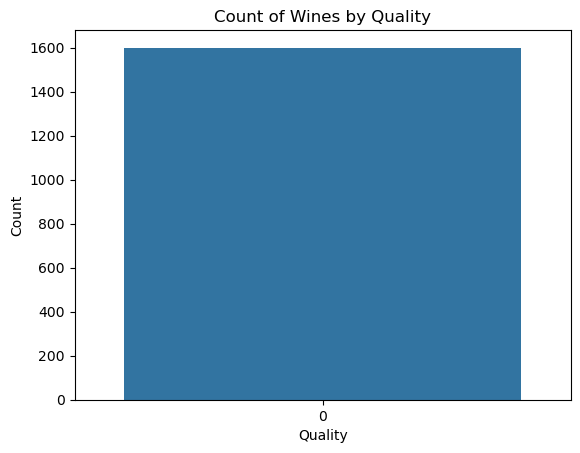

In [21]:
# Lets plot this on a graph(bar graph)

sns.countplot(wine['quality'])

plt.xlabel('Quality')
plt.ylabel('Count')
plt.title('Count of Wines by Quality')

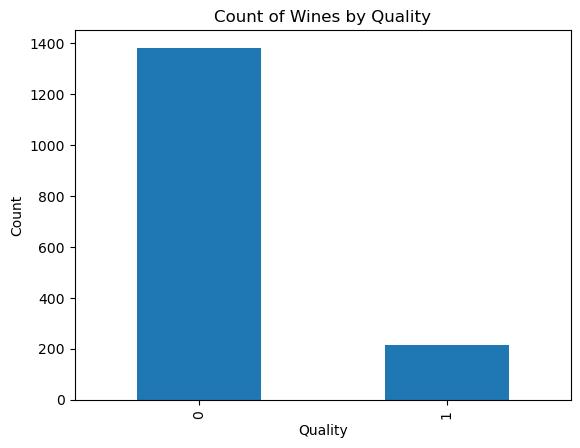

In [22]:
# OR

wine['quality'].value_counts().plot(kind='bar')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.title('Count of Wines by Quality')
plt.show()


In [23]:
# Now separate the dataset as response variable and feature variables

X=wine.drop('quality', axis=1)
y=wine['quality']

In [24]:
# Now we have dropped the quality for X and added quality for y.

In [25]:
# Train and Test Splitting of Data

X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=42)

In [26]:
# Applying standard scaling to get optimized result

sc=StandardScaler()
X_train=sc.fit_transform(X_train)    # fit is used to train data
X_test=sc.transform(X_test)

In [27]:
# Now lets print the first 10 of the X_train model

X_train[:10]

array([[ 0.21833164,  0.88971201,  0.19209222,  0.30972563, -0.04964208,
         0.69100692,  1.04293362,  1.84669643,  1.09349989,  0.45822284,
         1.12317723],
       [-1.29016623, -1.78878251,  0.65275338, -0.80507963, -0.45521361,
         2.38847304,  3.59387025, -3.00449133, -0.40043872, -0.40119696,
         1.40827174],
       [ 1.49475291, -0.78434707,  1.01104539, -0.52637831,  0.59927236,
        -0.95796016, -0.99174203,  0.76865471, -0.07566946,  0.51551749,
        -0.58738978],
       [ 0.27635078,  0.86181102, -0.06383064, -0.66572897, -0.00908493,
         0.01202048, -0.71842739,  0.08948842,  0.05423824, -1.08873281,
        -0.96751578],
       [ 0.04427419,  2.81487994, -0.62686095,  2.39998549, -0.31326357,
        -0.47296984,  0.2229897 ,  1.1998714 ,  0.37900751, -0.9741435 ,
        -0.49235828],
       [-0.07176411, -0.78434707,  1.11341454, -0.17800167,  0.21397941,
         3.01896045,  2.62208486,  0.60694845,  0.44396136,  1.89058918,
        -0.587

## The most commonly used Classifiers
### (A) Random Forest Classifier
### (B) Support Vector Machine Classifier
### (C) Neural Network Classifier

### (A) Random Forest Classifier

In [28]:
rfc=RandomForestClassifier(n_estimators=200) # n_estimators=200 refers to how many trees/models 
                                             # we have in the forest or classifier
# Train the model
rfc.fit(X_train, y_train)

# predit the rfc model by testing it
pred_rfc=rfc.predict(X_test)

In [29]:
# predict the first 20 variables of rfc

pred_rfc[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [30]:
# The results above shows that the number of high quality tree in the forest is 2
# The rest is 18 low quality tress or bad trees

In [31]:
# Print the first 20 variables of X-test rfc

X_test[:20]

array([[-3.61859850e-01,  1.64286407e-01, -9.85152962e-01,
        -3.86510130e-02,  5.18158057e-01, -1.81975648e-01,
        -1.99566462e-02,  1.75731759e-01, -4.65392578e-01,
        -1.34389336e-04, -7.77452782e-01],
       [-3.03840702e-01, -1.70525408e-01, -5.24491803e-01,
        -6.65728970e-01, -1.30756387e-01,  4.97010797e-01,
         1.68066777e+00, -4.17191190e-01,  5.08915214e-01,
        -1.03143815e+00, -8.72484283e-01],
       [ 1.37871461e+00,  7.78108067e-01, -2.68568937e-01,
         1.00699644e-01,  3.76208022e-01,  1.09018543e-01,
        -3.84376165e-01,  1.95450060e+00, -2.05577167e-01,
         1.83329452e+00, -4.92358280e-01],
       [ 1.02293339e-01, -3.93733284e-01,  1.92092221e-01,
        -2.12839335e-01, -2.11870693e-01,  1.56398950e+00,
         3.44462872e-01,  6.60850535e-01,  1.19192097e-01,
        -6.87670232e-01, -5.87389780e-01],
       [-9.42051337e-01, -3.93733284e-01, -1.66199791e-01,
        -5.96053642e-01, -2.32149269e-01,  2.06016607e-01,
  

In [32]:
# Lets see how well our model performed

print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94       273
           1       0.68      0.55      0.61        47

    accuracy                           0.90       320
   macro avg       0.80      0.75      0.78       320
weighted avg       0.89      0.90      0.89       320



In [33]:
# The precision of low quality trees is 0.92(92%)
# The precision of high quality trees is 0.73(73%)

In [34]:
# Print the confusion matrix of the rfc model 

print(confusion_matrix(y_test, pred_rfc))

[[261  12]
 [ 21  26]]


### (B) Support Vector Machine Classifier

In [35]:
clf=svm.SVC()
clf.fit(X_train, y_train) # train the data
pred_clf=clf.predict(X_test) # pred the test data

In [36]:
# Lets see how well our model performed

print(classification_report(y_test, pred_clf))
print(confusion_matrix(y_test, pred_clf))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       273
           1       0.71      0.26      0.37        47

    accuracy                           0.88       320
   macro avg       0.80      0.62      0.65       320
weighted avg       0.86      0.88      0.85       320

[[268   5]
 [ 35  12]]


In [37]:
# The precision of low quality trees is 0.88(88%)
# The precision of high quality trees is 0.71(71%)

### (C)Neural Network Classifier

In [38]:
# Example, picture processing involves much of neural networks

In [39]:
mlpc=MLPClassifier(hidden_layer_sizes=(11,11,11), max_iter=500)

# Train the model
mlpc.fit(X_train, y_train)

# predict the test model
pred_mlpc=mlpc.predict(X_test)

C:\DATA ANALYTICS COURSE-QUANTUM ANALYTICS\New folder\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [40]:
# Lets see how our model performed
print(classification_report(y_test, pred_mlpc))
print(confusion_matrix(y_test, pred_mlpc))

              precision    recall  f1-score   support

           0       0.90      0.95      0.93       273
           1       0.59      0.40      0.48        47

    accuracy                           0.87       320
   macro avg       0.75      0.68      0.70       320
weighted avg       0.86      0.87      0.86       320

[[260  13]
 [ 28  19]]


In [41]:
# The precision of low quality trees is 0.93(93%)
# The precision of high quality trees is 0.65(65%)

In [42]:
# Confusion Matrix

# Here's what each number represents: 
# [[259  14]
# [ 21  26]]



# 259 (True Positives - TP): This represents the number of correct positive predictions. 
# In this case, the model correctly predicted 259 positive cases.

# 14 (False Positives - FP): These are cases where the model incorrectly predicted the positive class, 
# but the actual class was negative. The model falsely identified 14 instances as positive.

# 21 (False Negatives - FN): These are cases where the model incorrectly predicted the negative class, 
# but the actual class was positive. The model failed to identify 21 positive instances.

# 26 (True Negatives - TN): This represents the number of correct negative predictions. 
# The model correctly predicted 26 negative cases.

In [43]:
# Comparatively, the Random Forest Classifier had the best average precision score of 0.91(91%)
# Neural network classifier had an average precision score of 0.88(88%)
# Support Vector Machine Classifier had the least average precision of 0.86(86%)

In [44]:
# Checking for the accuracy score of Random Forest Classifier

from sklearn.metrics import accuracy_score
cm=accuracy_score(y_test, pred_rfc)
cm

0.896875

In [45]:
# Therefore, the accuracy score of Random Forest Classifier is 0.90625 0r 90%

In [46]:
# Print the first top 10 of wine data

wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,0


In [47]:
# Out of the above displayed wines, only 2 of those wines are of high quality.
# The rest of the wines are of low quality

In [48]:
# Create new data

Xnew=[[7.3, 0.58, 0.00, 2.0, 0.065, 15.0, 21.0, 0.9946, 3.36, 0.47, 10.0]]
Xnew=sc.transform(Xnew) # transform the new data
ynew=rfc.predict(Xnew)  # predict the new data

# print new data
ynew

C:\DATA ANALYTICS COURSE-QUANTUM ANALYTICS\New folder\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0])

In [49]:
# The above results shows a bad wine or wine of low quality